#  NLP Classification Project: CleanWatAI


##  Project Overview

The CleanWatAI project aims to classify water-related news excerpts using Natural Language Processing (NLP) techniques. 
By leveraging both structured and unstructured data, our objective is to detect early signs of water contamination, supply risk, and infrastructure vulnerability in different regions.

This notebook follows a structured data science workflow inspired by the CRISP-DM methodology, enriched with textual insights from NLP feature engineering and model optimization. 

**Project Goals:**
- Clean and explore the dataset (both structured and textual).
- Engineer meaningful features, especially from text.
- Apply various NLP models to classify excerpts based on contamination risk.
- Evaluate and interpret model performance with emphasis on explainability.


## Data Loading and Initial Exploration



In this section, we will:
- Load the dataset
- Display basic structure and size
- Check column types and missing values


In [13]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\data\raw\water_sanitation.csv')
df.head()

,entry_id,country,source_title,excerpt,geo_location,water_source,sanitation_type,sector,gender,age_group,...,water_color,water_clarity,water_odor,recent_rain,nearby_activities,nearby_infrastructure,vegetation_near_source,waste_disposal_nearby,animal_access,water_flow_rate
0,81a69ab1-6070-4643-ab31-062dabbe355d,Haiti,Skill may certainly off sing.,Health inspectors on site found that improper ...,5.937200,River,Open Defecation,Health,Female,Youth,...,clear,clear,chemical,no,farming,waste facilities,lush,managed sites,no,slow
1,e4774c0e-38ca-48bc-a62d-56ad7dc2ebf1,Ethiopia,Cup movie than fund artist.,The latest sanitation review indicated that im...,34.615215,Borehole,Composting Toilet,Public Infrastructure,Male,Youth,...,murky,turbid,sewage,yes,farming,waste facilities,sparse,none,yes,stagnant
2,ed103eee-2e27-4be4-b6fe-59e1b095a507,Nepal,Note Congress day million everybody environmen...,"According to recent field observations, waste ...",-68.387244,Truck Delivery,Pit Latrine,Health,Female,Adult,...,green,clear,sewage,no,mining,waste facilities,dead,managed sites,yes,flowing
3,4d8e529d-08cd-428b-b4a8-e4c4cbadeb33,India,Summer today southern.,The latest sanitation review indicated that ef...,-71.814776,Rainwater,Composting Toilet,Education,Male,Elderly,...,brown,turbid,sewage,no,mining,sewage lines,dead,managed sites,yes,slow
4,8396148f-36a8-4ee9-af7f-653b8d06aa9c,Kenya,Region sea nation fast shake born.,A comprehensive report issued by the agency no...,-10.132914,Borehole,Composting Toilet,Public Infrastructure,Female,Youth,...,murky,cloudy,none,no,none,waste facilities,lush,open dumping,no,stagnant


##  Exploratory Data Analysis (EDA)

In this section, we will explore the structure and quality of the dataset.  
We aim to:
- Understand the types of features (structured vs. unstructured)
- Identify any missing or duplicate values
- Examine the distribution of the target variable
- Begin understanding patterns in the text

> EDA helps us spot problems early and form hypotheses for modeling.


In [14]:
print(df.columns)

Index(['entry_id', 'country', 'source_title', 'excerpt', 'geo_location',
       'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
       'income_level', 'infrastructure_type', 'population_density',
       'climate_zone', 'year', 'organization', 'source_type',
       'special_needs_group', 'severity', 'water_color', 'water_clarity',
       'water_odor', 'recent_rain', 'nearby_activities',
       'nearby_infrastructure', 'vegetation_near_source',
       'waste_disposal_nearby', 'animal_access', 'water_flow_rate'],
      dtype='object')


In [15]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entry_id                4157 non-null   object 
 1   country                 4157 non-null   object 
 2   source_title            4157 non-null   object 
 3   excerpt                 4157 non-null   object 
 4   geo_location            4157 non-null   float64
 5   water_source            4157 non-null   object 
 6   sanitation_type         4157 non-null   object 
 7   sector                  4157 non-null   object 
 8   gender                  4157 non-null   object 
 9   age_group               4157 non-null   object 
 10  income_level            4157 non-null   object 
 11  infrastructure_type     4157 non-null   object 
 12  population_density      4157 non-null   object 
 13  climate_zone            4157 non-null   object 
 14  year                    4157 non-null   

In [16]:
# Missing value analysis
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

special_needs_group    779
dtype: int64

In [17]:
# Checking for duplicates
df.duplicated().sum()

1157

In [18]:
df['excerpt'][10:20]

10    Field workers have documented that access to p...
11    Water availability remains a key concern where...
12    Field workers have documented that waste manag...
13    A comprehensive report issued by the agency no...
14    A comprehensive report issued by the agency no...
15    A comprehensive report issued by the agency no...
16    Field workers have documented that access to p...
17    According to joint analysis from stakeholders,...
18    In the most affected zones, chlorination units...
19    A comprehensive report issued by the agency no...
Name: excerpt, dtype: object

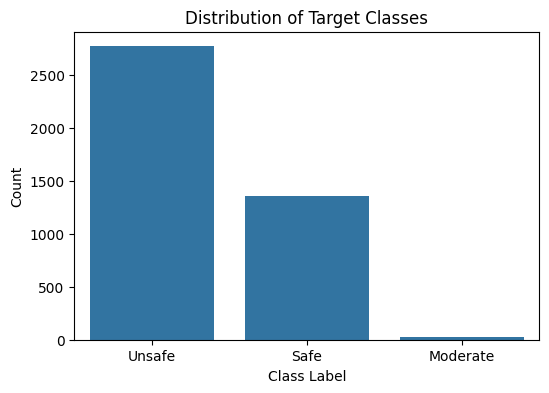

In [19]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='severity', data=df)
plt.title("Distribution of Target Classes")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


<Figure size 600x400 with 0 Axes>

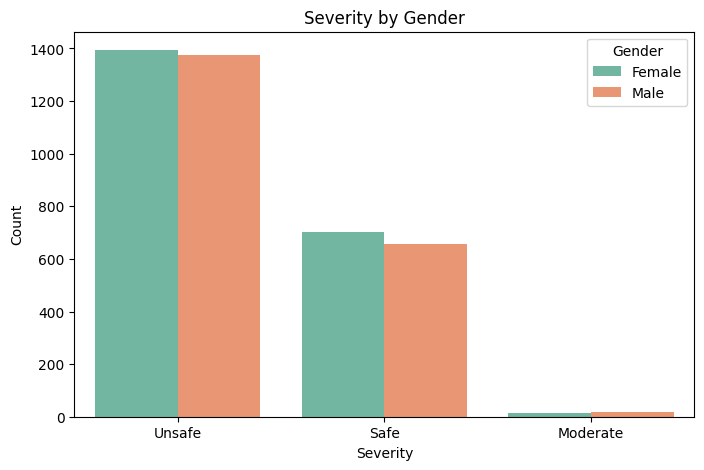

In [20]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
plt.figure(figsize=(8, 5))
sns.countplot(x='severity', hue='gender', data=df, palette='Set2')
plt.title("Severity by Gender")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

##  Data Cleaning

In this section, we will perform essential cleaning tasks to ensure data quality and consistency.  
This includes:
- Dropping duplicates
- Handling missing values
- Normalizing inconsistent entries
- Filtering irrelevant rows if applicable


In [21]:
# Viewing missing values and null values
for col in  df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} : {df[col].isna().sum()}')

special_needs_group : 779


In [22]:
# Replacing actual NaN values
df['special_needs_group'] = df['special_needs_group'].fillna('none')

# Also replacing string "None" values if they exist
df['special_needs_group'] = df['special_needs_group'].replace('None', 'none')
df['special_needs_group'].value_counts()

special_needs_group
Children Under 5    891
Elderly             834
Disabled            831
Pregnant Women      822
none                779
Name: count, dtype: int64

In [23]:
# Dropping duplicate rows
initial_shape = df.shape
df = df.drop_duplicates()
print(f"Dropped {initial_shape[0] - df.shape[0]} duplicate rows.")
print(f'Duplicated entries : {df.duplicated().sum()}')

Dropped 1157 duplicate rows.
Duplicated entries : 0


**Enriching Location Data**

To support rich geographical analysis and live visualizations, we will enhance our `geo_location` and `country` columns.

We aim to:
- Convert `geo_location` (text) into **latitude & longitude**
- Break down `country` into **county, constituency, area, and location** 
- Enable mapping tools like **Plotly**, **Folium**, or **Tableau** to interact with enriched data

In [24]:
from geopy.geocoders import Nominatim
import time
import pycountry

# Initialize geolocator
geolocator = Nominatim(user_agent="cleanwatAI_geolocator")

# Standardize country names using pycountry
def standardize_country(name):
    try:
        return pycountry.countries.lookup(name).name
    except:
        return name

# Get lat/lon using geopy
def get_lat_lon(country_name):
    try:
        location = geolocator.geocode(country_name)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

df['country_standardized'] = df['country'].apply(standardize_country)
country_coords = df['country_standardized'].dropna().unique()
coord_map = {}

for country in country_coords:
    lat_lon = get_lat_lon(country)
    coord_map[country] = lat_lon
    time.sleep(1)

# Map coordinates back to DataFrame
df[['latitude', 'longitude']] = df['country_standardized'].map(coord_map).apply(pd.Series)


ModuleNotFoundError: No module named 'geopy'

In [ ]:
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

In [ ]:
from shapely.geometry import Point

# Drop rows with missing coordinates
df_clean = df.dropna(subset=['latitude', 'longitude'])

# Create geometry column
df_clean['geometry'] = df_clean.apply(lambda r: Point(float(r['longitude']), float(r['latitude'])), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_clean, geometry='geometry', crs="EPSG:4326")

In [ ]:
gdf = gpd.sjoin(gdf, world[['geometry', 'NAME', 'CONTINENT']], how='left', predicate='within')
df['country'] = gdf['NAME']
df['continent'] = gdf['CONTINENT']

In [ ]:
admin1_path = r"C:\Users\USER\Documents\Flatiron\Capstone Project\CleanWatAI\reports\Admin\ne_10m_admin_1_states_provinces.shp"
admin1 = gpd.read_file(admin1_path)

if 'index_right' in gdf.columns:
    gdf = gdf.drop(columns=['index_right'])

if 'index_right' in admin1.columns:
    admin1 = admin1.drop(columns=['index_right'])

gdf = gpd.sjoin(gdf, admin1[['name', 'iso_a2', 'geometry']], how='left', predicate='within')

# 2. Rename columns FIRST
gdf = gdf.rename(columns={'name': 'admin_region', 'iso_a2': 'country_code'})

# 3. Assign to your original DataFrame
df['admin_region'] = gdf['admin_region']
df['country_code'] = gdf['country_code']

In [ ]:
# Define colors for each severity level
severity_colors = {
    'Unsafe': 'red',
    'Moderate': 'orange',
    'safe': 'green'
}


In [ ]:
import folium
from folium.plugins import MarkerCluster

# marker color based on severity
def get_marker_color(severity):
    if severity == 'Safe':
        return 'green'
    elif severity == 'Moderate':
        return 'orange'
    elif severity == 'Unsafe':
        return 'red'
    else:
        return 'gray'

# Base map centered on mean coordinates
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=3, tiles='cartodbpositron')

# Add marker cluster to group nearby points
marker_cluster = MarkerCluster().add_to(m)

# Add markers with popups and color-coded severity
for _, row in df.dropna(subset=['latitude', 'longitude', 'severity']).iterrows():
    color = get_marker_color(row['severity'])

    # Prepare popup HTML
    popup_html = f"""
    <b>Country:</b> {row['country']}<br>
    <b>Region:</b> {row['admin_region']}<br>
    <b>Water Source:</b> {row['water_source']}<br>
    <b>Severity:</b> {row['severity']}<br>
    <b>Title:</b> {row['source_title']}
    """

    # Add CircleMarker to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=250)
    ).add_to(marker_cluster)

# visualizethe map
m


In [ ]:
severity_map = {
    'Safe': 0,
    'Moderate': 1,
    'Unsafe': 2
}

# Create a numeric severity column
df['severity_score'] = df['severity'].map(severity_map)

# Now you can group and plot the mean severity
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('year')['severity_score'].mean().plot(ax=ax, color='teal', marker='o')

ax.set_title('Average Water Contamination Severity Over Time', weight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Severity Score (0=Safe, 2=Unsafe)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df.groupby(['year', 'age_group']).size().reset_index(name='count'),
             x='year', y='count', hue='age_group', palette='rainbow', ax=ax)

ax.set_title('Age Group Distribution Over the Years', weight='bold')
ax.grid(axis='y')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Drop missing or invalid data
df_clean = df.dropna(subset=['country', 'year'])
df_clean['year'] = df_clean['year'].astype(str)

# Count reports per (country, year)
heatmap_data = df_clean.groupby(['country', 'year']).size().unstack(fill_value=0)

top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(20).index
heatmap_top = heatmap_data.loc[top_countries]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_top, cmap="YlOrBr", annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Reports'})
    
plt.title("Water-Related Reports by Country and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
severity_map = {
    'Safe': 1,
    'Moderate': 2,
    'Unsafe': 3
}
df_clean['severity_score'] = df_clean['severity'].map(severity_map)
severity_heatmap = df_clean.groupby(['country', 'year'])['severity_score'].mean().unstack()
top_countries = df_clean['country'].value_counts().head(15).index
severity_heatmap_top = severity_heatmap.loc[top_countries]


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap: green (safe) → orange (moderate) → red (unsafe)
cmap = LinearSegmentedColormap.from_list("severity", ['green', 'orange', 'red'])

plt.figure(figsize=(14, 8))
sns.heatmap(
    severity_heatmap_top,
    cmap=cmap,
    annot=True,
    fmt='.1f',
    linewidths=.5,
    cbar_kws={'label': 'Average Severity (1=Safe, 3=Unsafe)'}
)

plt.title("Average Severity of Water-Related Reports by Country and Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Heatmap Visualizations Summary**

#### Water-Related Reports by Country and Year
This heatmap shows the **number of water-related reports** recorded across countries from **2015 to 2025**.

- **Darker shades** indicate **more reports**.
- Countries like **Nepal**, **Nigeria**, and **Ethiopia** show high reporting activity.
- Highlights trends in reporting, possibly due to increased awareness or worsening conditions in certain years.

#### Average Severity of Reports by Country and Year
This heatmap presents the **average severity score** (on a scale of **1 = Safe** to **3 = Unsafe**) for water-related reports.

- **Green** indicates **lower average severity** (safer), while **red** indicates **higher severity** (more unsafe).
- Most averages are between **2.6 and 3**, suggesting generally **moderate to high severity** levels.
- A few **green cells** (e.g., Uganda 2016, Ethiopia 2016) reflect **less severe years**, but these are rare.

These visualizations provide insight into both the **volume** and **intensity** of water-related issues over time and geography.


In [ ]:
# Select categorical water quality features
features_to_plot = [
    'water_color', 'water_clarity', 'water_odor', 'recent_rain',
    'nearby_activities', 'nearby_infrastructure', 'vegetation_near_source',
    'waste_disposal_nearby', 'animal_access', 'water_flow_rate'
]

# Set up subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Plot count plots for each feature colored by severity
for i, feature in enumerate(features_to_plot):
    # Group by feature and severity, count occurrences
    df_grouped = df.groupby([feature, 'severity']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    df_grouped.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set1')
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Severity')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Severity')

# Adjust layout
plt.tight_layout()


In [ ]:
source_df = pd.crosstab(df['organization'], df['source_type'])
source_df

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
source_df.plot.bar(stacked=False, ax=ax, colormap='tab20')

ax.set_title('Organizations Source', weight='bold')
ax.set_xlabel('Name')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Hide spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

##  Text Preprocessing (Excerpt Column)

To prepare our text data for modeling, we must standardize and clean the raw text in the `excerpt` column.  

We will:
- Convert all text to lowercase
- Remove punctuation, digits, and extra whitespace
- Remove stopwords (like "the", "is", "and")
- Tokenize the text (split into words)
- Apply lemmatization to reduce words to base form



In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    
    # Tokenize
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)
   


In [ ]:
# Apply to the excerpt column
df['clean_excerpt'] = df['excerpt'].astype(str).apply(clean_text)
df[['excerpt', 'clean_excerpt']].head()


- Texts were lowercased, cleaned, tokenized, and lemmatized.
- The processed text is stored in `clean_excerpt`.
- This column will now be used for vectorization (TF-IDF, Bag-of-Words, etc.).

**Word Frequency Distribution**

Before vectorizing the text, it's useful to understand which words appear most frequently.

We will:
- Tokenize all cleaned excerpts.
- Count each word's occurrence.
- Visualize the top 20 most frequent words.


In [ ]:
from collections import Counter

# Combine all cleaned text into a single list of words
all_words = ' '.join(df['clean_excerpt']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Create DataFrame for plotting
freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=freq_df, palette='rainbow', hue='Word', legend=True)
plt.title('Top Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()

In [ ]:
df['text_length'] = df['excerpt'].astype(str).apply(lambda x: len(x.split()))

sns.histplot(df['text_length'], bins=20, kde=True, color='purple')
plt.title('Word Count Distribution in Excerpts', weight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reports')
plt.tight_layout()
plt.show()



##  Feature Engineering

In this step, we convert the cleaned text and any selected structured features into a machine-readable format.

We will:
- Use **TF-IDF** to vectorize the `clean_excerpt` column.
- Select meaningful structured features for modeling.
- Combine both feature sets into a single matrix `X` for training.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))

# Fit and transform the cleaned text
X_text = tfidf.fit_transform(df['clean_excerpt'])

# Convert to DataFrame for inspection
X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())
print(X_text_df.sum().sort_values(ascending=False).head())
X_text_df.head()


In [ ]:
# List of selected features for structured modeling
selected_features = [
    'country', 'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
    'income_level', 'infrastructure_type', 'population_density', 'climate_zone', 'year',
    'severity_score', 'recent_rain', 'water_color', 'water_clarity', 'water_odor',
    'animal_access', 'waste_disposal_nearby', 'vegetation_near_source', 'water_flow_rate'
]

# Creating a new DataFrame with only selected features
df_structured = df[selected_features].copy()

# Preview the cleaned structured data
df_structured.head()

In [ ]:
numerical_cols = df_structured.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_structured.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

In [ ]:
# Checking for missing values in structured data
missing_values = df_structured.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Categorical features non-numeric
categorical_cols = [
    'country', 'water_source', 'sanitation_type', 'sector', 'gender',
    'age_group', 'income_level', 'infrastructure_type', 'climate_zone',
    'recent_rain', 'vegetation_near_source',
    'waste_disposal_nearby', 'animal_access', 'water_color', 'water_clarity',
    'water_odor', 'population_density', 'water_flow_rate'
]

# Numerical features
numerical_cols = [
    'severity_score',  'year'
]

# Preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

# Fit and transform the structured data
X_structured = preprocessor.fit_transform(df_structured)

# View shape of final structured feature matrix
print("Shape after encoding & scaling:", X_structured.shape)


In [ ]:
# For visualization, get feature names
encoded_feature_names = (
    preprocessor.named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
)
all_feature_names = numerical_cols + list(encoded_feature_names)

# Turn into a DataFrame
df_structured_transformed = pd.DataFrame(X_structured, columns=all_feature_names)

df_structured_transformed.head()

**Text + Structured Feature Integration**

In this step, we combine both structured and unstructured features to build a more comprehensive predictive model. 

**Why Combine Both?**
Structured data (like year, severity score, country, etc.) gives us quantifiable attributes of each record, while the text data (like the 'excerpt' or description) provides contextual insights that might not be captured numerically.

In [ ]:
from scipy.sparse import hstack, csr_matrix

# Define structured features
categorical_cols = [
    'country', 'water_source', 'sanitation_type', 'sector', 'gender', 'age_group',
    'income_level', 'infrastructure_type', 'population_density', 'climate_zone',
    'recent_rain', 'water_color', 'water_clarity', 'water_odor', 'animal_access',
    'waste_disposal_nearby', 'vegetation_near_source', 'water_flow_rate'
]

numerical_cols = ['year', 'severity_score']

# Preprocess Categorical Data with OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_categorical = ohe.fit_transform(df[categorical_cols])

# Preprocess Numerical Data with StandardScaler
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[numerical_cols])
X_numerical_sparse = csr_matrix(X_numerical)

# TF-IDF Vectorization for Text Data
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df['clean_excerpt'])

# Combine All Features
X_final = hstack([X_text, X_categorical, X_numerical_sparse])

print("Final combined feature matrix shape:", X_final.shape)


**What We Did:**
- We **vectorized the 'excerpt' column** using TF-IDF (Term Frequency-Inverse Document Frequency), which converts text into numerical features based on word importance.
- We **concatenated** these TF-IDF features with the structured features (both numerical and one-hot encoded categorical variables) into a single dataset.
- This integration allows the model to learn patterns from both the **content of the text** and the **demographics/context** of each water safety report.

The final feature matrix now includes:
- Encoded structured features (e.g., water source, sanitation type, country, etc.)
- Scaled numerical columns (e.g., severity_score, year)
- TF-IDF features from the text column (e.g., 'excerpt')

We are now ready to train machine learning models on this combined dataset for improved prediction performance.